# Exploratory Data Analysis: Part 2

## Dataset

- A census dataset is available at [github](https://github.com/WinVector/zmPDSwR/blob/master/Custdata/custdata2.tsv), which will be used for demonstrating the steps of data cleaning, imputation and prepartion. The dataset is taken from the book [Practical Data Science with R](https://www.manning.com/books/practical-data-science-with-r)

- The dataset contains information about customers like 
    - gender
    - if he or she is currently employed or not
    - income
    - marital status
    - house type where he or she lives
    - whether moved in recently 
    - number of vehicles owned
    - age 
    - state of residence
    - Whether he or she has an insurance cover. 

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

## Read Dataset

In [3]:
custdata = pd.read_csv('custdata.tsv', sep = '\t')

In [4]:
custdata.head(10)

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res
0,2068,F,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49,Michigan
1,2848,M,True,4500,Never Married,False,Rented,True,3.0,22,Georgia
2,5641,M,True,20000,Never Married,False,Occupied with no rent,False,0.0,22,New Mexico
3,6369,F,True,12000,Never Married,True,Rented,True,1.0,31,Florida
4,8322,F,True,180000,Never Married,True,Homeowner with mortgage/loan,False,1.0,40,New York
5,8521,M,True,120000,Never Married,True,Homeowner free and clear,True,1.0,39,Idaho
6,12195,M,True,40000,Married,True,Rented,False,3.0,48,Michigan
7,14989,M,NaN,9400,Married,True,Rented,False,2.0,44,Illinois
8,15917,F,True,24000,Divorced/Separated,True,Homeowner free and clear,False,1.0,70,North Carolina
9,16551,F,NaN,7000,Married,True,Homeowner with mortgage/loan,False,2.0,46,Georgia


## Metadata Exploration

In [5]:
custdata.shape

(910, 11)

In [6]:
custdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   custid        910 non-null    int64  
 1   sex           910 non-null    object 
 2   is.employed   655 non-null    object 
 3   income        910 non-null    int64  
 4   marital.stat  910 non-null    object 
 5   health.ins    910 non-null    bool   
 6   housing.type  879 non-null    object 
 7   recent.move   879 non-null    object 
 8   num.vehicles  879 non-null    float64
 9   age           910 non-null    int64  
 10  state.of.res  910 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 72.1+ KB


#### Note:

* It can be observed that some of the columns like *is.employed*, *housing.type*, *recent.move* and *num.vehicles* have missing values.

## Visualize the missing values

* There are libaries like **missingno** are available for visualizing missing values and if any relationship exist between these missing values like if one is missing the other is also missing. 

* *missingno* can be installed through *pip*
    - pip install missingno

In [12]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import matplotlib.pyplot as plt
import seaborn as sn
import missingno as msno

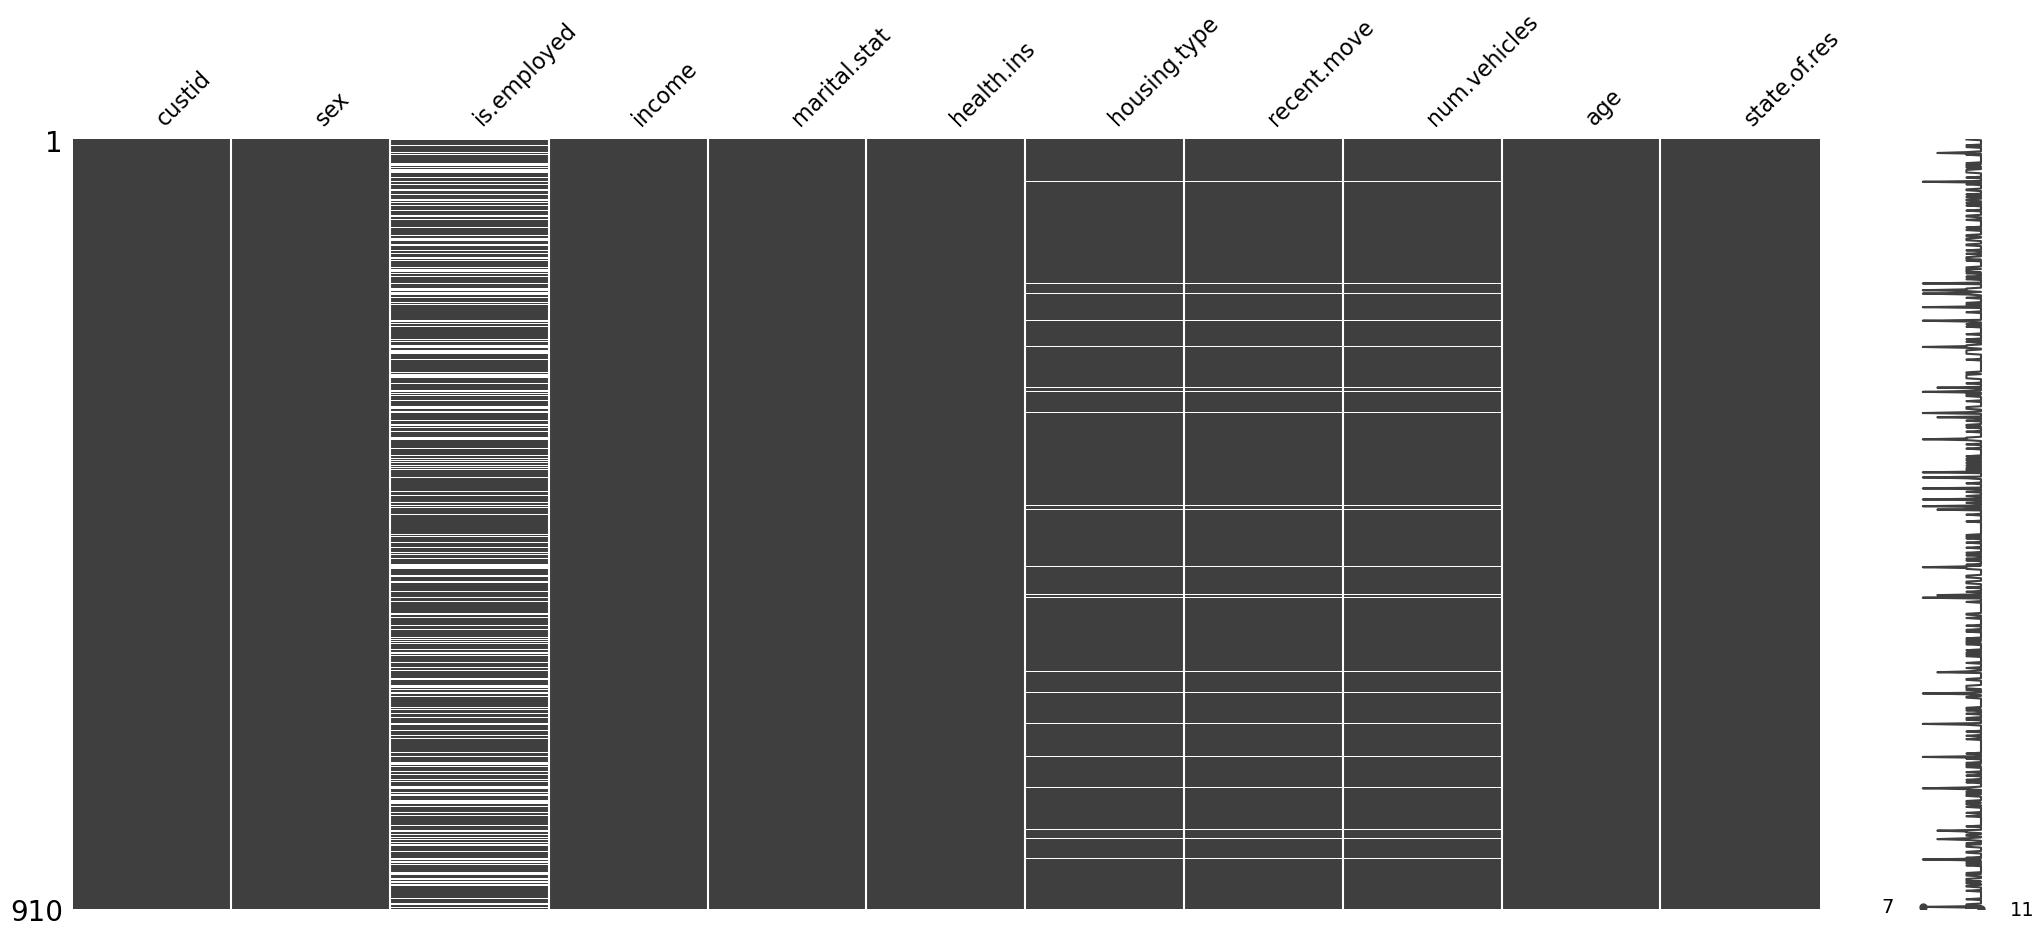

In [16]:
msno.matrix(custdata);

#### Note:

* *is.employed* is missing from may observations. *housing.type*, *recent.move* and *num.vehicles* are also missing from some observations, but there seems to be some pattern to it. We can create a heatmap of these missing values and confirm this pattern.

### Count or percentage of missing values

In [18]:
custdata.isnull().sum()

custid            0
sex               0
is.employed     255
income            0
marital.stat      0
health.ins        0
housing.type     31
recent.move      31
num.vehicles     31
age               0
state.of.res      0
dtype: int64

## Why values are missing?

- There can be multiple reasons, why data is missing.

    - Data is not available at the time of capturing
    - It could be recording error, left empty intentionally or unintentionally
    - User might have intentionally not filled the data
    
  
  
    
- Missing data mechanisms are typically classified as either 
    - Missing Completely at Random (MCAR)
    - Missing at Random (MAR) 
    - Missing Not at Random (MNAR).

https://cran.r-project.org/web/packages/finalfit/vignettes/missing.html


For example,

- Quite a lot of values are missing in *is.employed* column.   
- This may be either because the person does not have an active/ full time job. So, at the time of capturing, user might not have filled the employment information if he or she is not employed? This is MNAR.


## How to deal with missing values?

There are multiple steps that can be taken

- Obtain the missing data;
- Leave out incomplete cases and use only those for which all variables are available;
- Replace missing data by a conservative estimate, e.g. the sample mean;
- Estimate the missing data from the other data on the person.

### How much missing value is accepted?

- More than 20% is too much missing.
- In some domain, missing values can not be imputed as it may lead high risk or it may inject too much noise.

### Drop samples with missing values

* All columns with null values can be removed from the dataset. Remove all observations where at least one data element is missing. 

In [19]:
cust_clean = custdata.dropna()

In [21]:
cust_clean.shape

(647, 11)

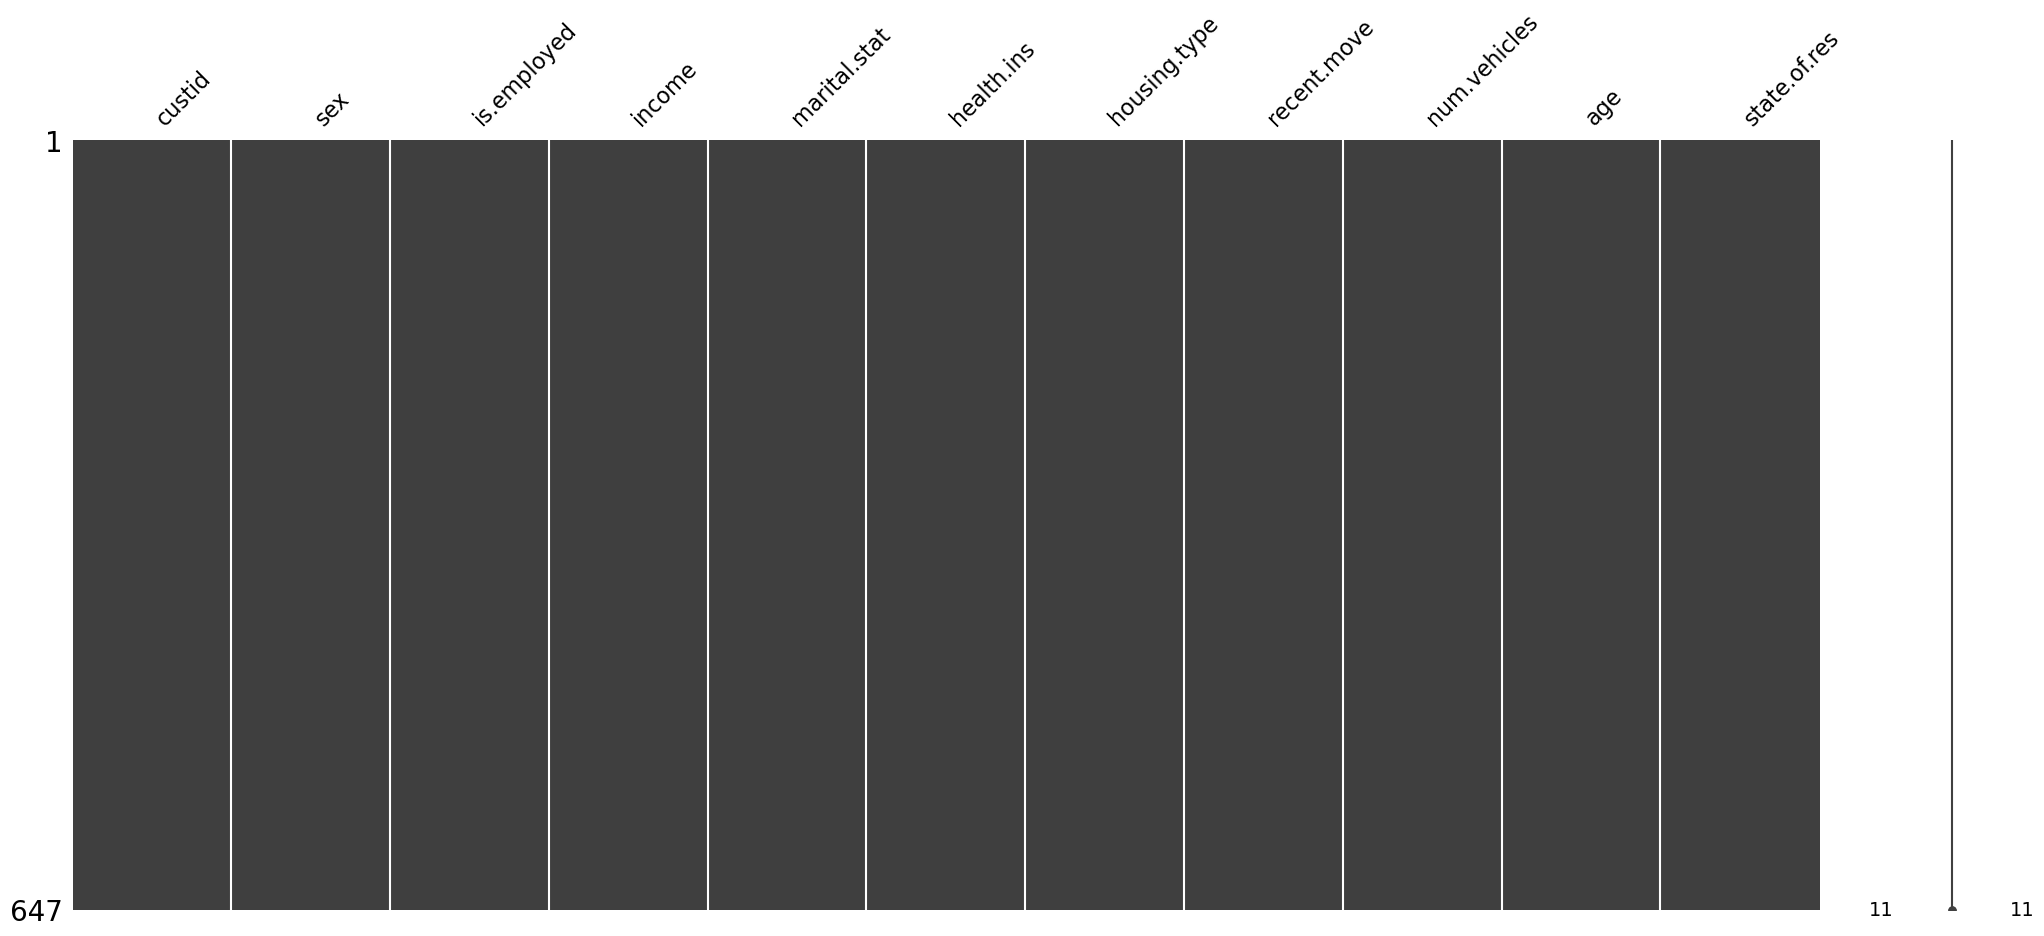

In [23]:
msno.matrix(cust_clean);

### Drop if values are missing from specific columns

* For example, only removing those observations where *is.employed* data is missing.

In [24]:
cust_clean = custdata.dropna(subset = ['num.vehicles'])

In [26]:
cust_clean.shape

(879, 11)

## Imputation Techniques

- Impute with default values
- Impute with estimated values
    - Numerial Features - Mean or median based imputation
    - Categorical Features - Most Frequent 
- Model based imputations

In [28]:
custdata['is.employeed_imputed1'] = custdata['is.employed'].fillna(False)

In [29]:
custdata.head(5)

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employeed_imputed1
0,2068,F,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49,Michigan,False
1,2848,M,True,4500,Never Married,False,Rented,True,3.0,22,Georgia,True
2,5641,M,True,20000,Never Married,False,Occupied with no rent,False,0.0,22,New Mexico,True
3,6369,F,True,12000,Never Married,True,Rented,True,1.0,31,Florida,True
4,8322,F,True,180000,Never Married,True,Homeowner with mortgage/loan,False,1.0,40,New York,True


## Income vs. Is Employed

In [30]:
income_employed = custdata[custdata['is.employed']==True]['income']
income_not_employed = custdata[custdata['is.employed']==False]['income']
income_missing = custdata[custdata['is.employed'].isnull()]['income']

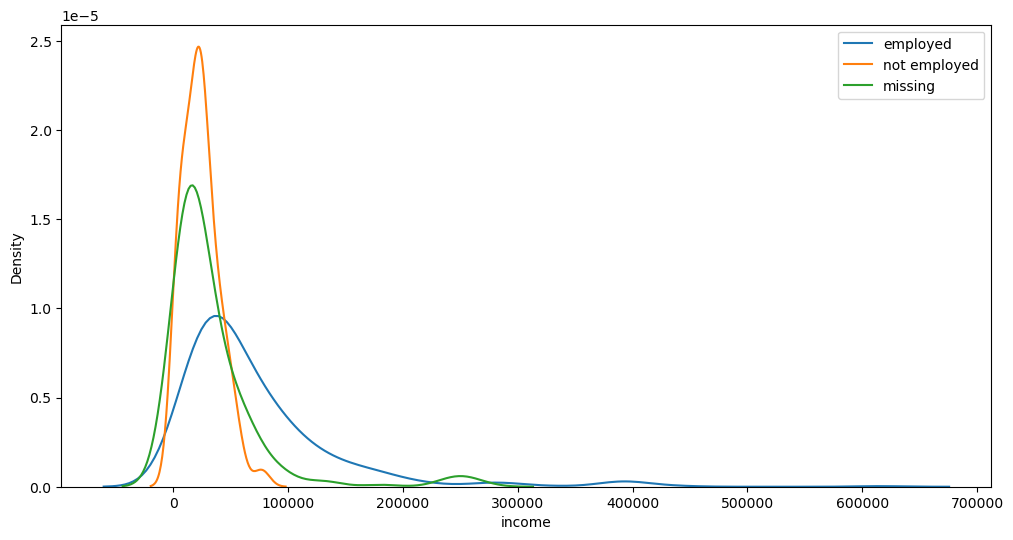

In [34]:
plt.figure(figsize=(12, 6))
sn.kdeplot(income_employed, label = 'employed')
sn.kdeplot(income_not_employed, label = 'not employed')
sn.kdeplot(income_missing, label = 'missing')
plt.legend();

In [35]:
from scipy import stats

In [36]:
stats.ttest_ind(income_not_employed, income_missing)

Ttest_indResult(statistic=-1.7830518684470351, pvalue=0.07554069839127192)

In [37]:
stats.ttest_ind(income_employed, income_missing)

Ttest_indResult(statistic=7.579601035289222, pvalue=9.106272547118738e-14)

### Is *is.employed* missing below a certain income level?

In [39]:
avg_income_not_employed = income_not_employed.mean()
avg_income_not_employed

23904.032258064515

In [40]:
custdata['is.employed_imputed2'] = (custdata['income'].map(lambda x:
                                    False if x<avg_income_not_employed else True))

## Imputing Number of Vehicles

- *num.vehicles* is a numerical variable and is a discrete variable. An imputation strategy of most frequent can be adopted for the missing values of this column.

In [42]:
custdata['num.vehicle_impute1'] = custdata['num.vehicles'].fillna(0.0)

## Most Frequent based imputation


In [45]:
from sklearn.impute import SimpleImputer

In [47]:
most_frequent_imputer = SimpleImputer(strategy='most_frequent', add_indicator=True)

In [48]:
num_vehicles_imputed = most_frequent_imputer.fit_transform(custdata[['num.vehicles']])

In [49]:
num_vehicles_imputed

array([[2., 0.],
       [3., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [2., 0.]])

In [51]:
custdata['num.vehicles_impute2'] = num_vehicles_imputed[:, 0]
custdata['num.vehicles_ind'] = num_vehicles_imputed[:, 1]

In [53]:
custdata[['num.vehicles', 
          'num.vehicles_impute2',
          'num.vehicles_ind']].sample(10, random_state = 100)

,num.vehicles,num.vehicles_impute2,num.vehicles_ind
106,2.0,2.0,0.0
24,2.0,2.0,0.0
487,1.0,1.0,0.0
399,NaN,2.0,1.0
837,1.0,1.0,0.0
40,3.0,3.0,0.0
107,1.0,1.0,0.0
608,0.0,0.0,0.0
736,1.0,1.0,0.0
579,2.0,2.0,0.0


### Using Model based Imputation

- The missing data can aso be estimated from other variables, for example income, age, housing.type etc. 

- We will discuss this later.

## When to apply imputation?

- We will discuss this later.

## Income Vs Insurance

In [54]:
custdata.head(5)

,custid,sex,is.employed,income,marital.stat,health.ins,housing.type,recent.move,num.vehicles,age,state.of.res,is.employeed_imputed1,is.employed_imputed2,num.vehicle_impute1,num.vehicles_impute2,num.vehicles_ind
0,2068,F,NaN,11300,Married,True,Homeowner free and clear,False,2.0,49,Michigan,False,False,2.0,2.0,0.0
1,2848,M,True,4500,Never Married,False,Rented,True,3.0,22,Georgia,True,False,3.0,3.0,0.0
2,5641,M,True,20000,Never Married,False,Occupied with no rent,False,0.0,22,New Mexico,True,False,0.0,0.0,0.0
3,6369,F,True,12000,Never Married,True,Rented,True,1.0,31,Florida,True,False,1.0,1.0,0.0
4,8322,F,True,180000,Never Married,True,Homeowner with mortgage/loan,False,1.0,40,New York,True,True,1.0,1.0,0.0


## Gender Vs. Insurance

In [56]:
pd.crosstab(custdata.sex,
            custdata['health.ins'],
            normalize='index')

health.ins,False,True
sex,,
F,0.108808,0.891192
M,0.146947,0.853053


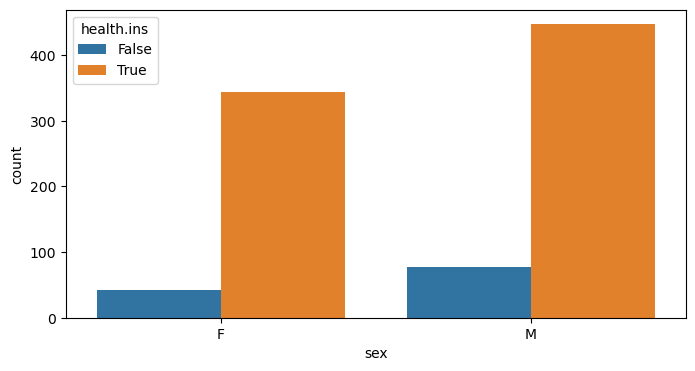

In [59]:
plt.figure(figsize=(8,4))
sn.countplot(data = custdata,
             x='sex',
             hue = 'health.ins');

## Income Vs State of Residence

In [60]:
len(custdata['state.of.res'].unique())

49

In [75]:
income_by_state = custdata.groupby('state.of.res')['income'].median().reset_index()

In [78]:
top10_states = income_by_state.sort_values('income', ascending = False)[0:10]
top10_states

,state.of.res,income
7,Delaware,94700.0
27,Nevada,80000.0
11,Idaho,70500.0
10,Hawaii,64100.0
3,Arkansas,64000.0
12,Illinois,60000.0
18,Maine,60000.0
37,Rhode Island,59550.0
35,Oregon,59000.0
30,New Mexico,56200.0


In [79]:
top10_state_names = top10_states['state.of.res']
top10_state_names

7         Delaware
27          Nevada
11           Idaho
10          Hawaii
3         Arkansas
12        Illinois
18           Maine
37    Rhode Island
35          Oregon
30      New Mexico
Name: state.of.res, dtype: object

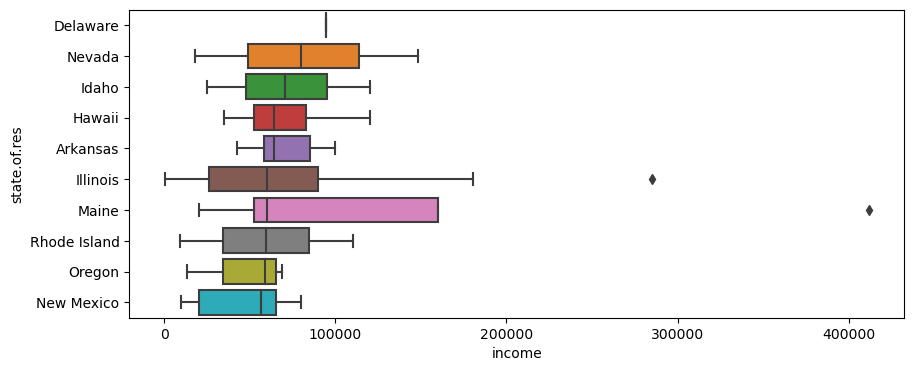

In [81]:
plt.figure(figsize=(10, 4));
sn.boxplot(data = custdata,
           y = 'state.of.res',
           x = 'income',
           orient = 'h',
           order = top10_state_names);

## State of Residence Vs. Housing Type

In [82]:
custdata['housing.type'].unique()

array(['Homeowner free and clear', 'Rented', 'Occupied with no rent',
       'Homeowner with mortgage/loan', nan], dtype=object)

In [83]:
top10_states_housing = custdata[custdata['state.of.res'].isin(top10_state_names)]

In [87]:
housing_by_state = pd.crosstab(top10_states_housing['state.of.res'],
                               top10_states_housing['housing.type'],
                               normalize = 'index');

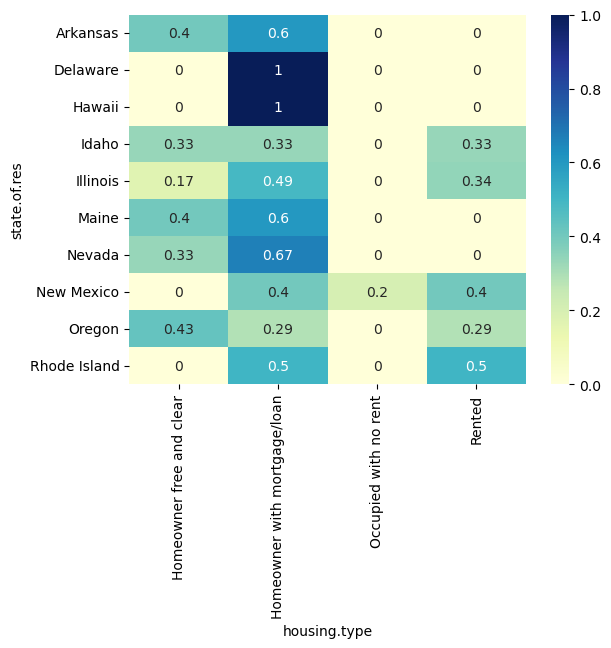

In [88]:
sn.heatmap(housing_by_state,
           annot=True,
           cmap ='YlGnBu');

## Age Vs. Income

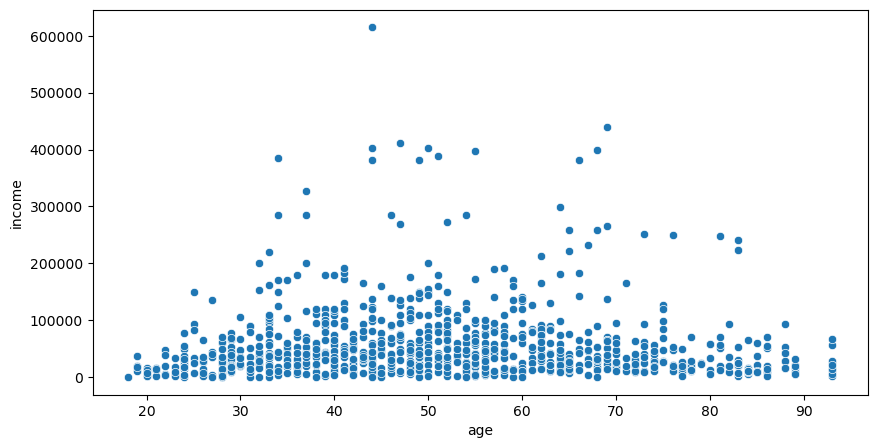

In [89]:
plt.figure(figsize=(10,5));
sn.scatterplot(data = custdata,
               x = 'age',
               y = 'income');

## Data Binning

- Sometimes a continuous variable may need to be binned into categories. 
    - For example, age. Sometimes it may make sense to divide the ages into ranges and then create categories like young, adult, midage & old. 
    - For example, income can be categorized into low-income, middle-income and high-income etc.

In [90]:
bins = [0, 18, 35, 55, 120]

In [91]:
group_name = ['young', 'adult', 'midage', 'old']

In [93]:
custdata['agegroup'] = pd.cut(custdata['age'], bins, labels = group_name)

In [94]:
custdata[['age', 'agegroup']].sample(10)

,age,agegroup
834,52,midage
800,40,midage
372,66,old
288,86,old
704,62,old
502,72,old
596,83,old
6,48,midage
67,37,midage
416,43,midage


## Income Vs Age Group

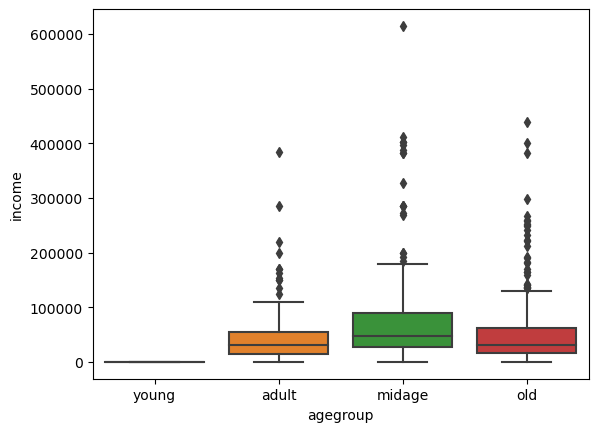

In [95]:
sn.boxplot(data = custdata,
           x ='agegroup',
           y ='income');